In [1]:
%config IPcompleter.use_jedi=False

### Two Layer Neural Network
<img src="img/2layernn.png">

In [1]:
class ArtificialNeuralNetwork:
    def __init__(self, x, y):
        self.IN      = x
        #initialize weights with random values
        self.W1   = np.random.rand(self.IN.shape[1],4) 
        self.W2   = np.random.rand(4,1)                 
        self.y          = y
        self.OUT     = np.zeros(self.y.shape)
        self.learning_rate = 0.3

<img src="./img/activation functions.png">

### Activation Function - Sigmoid


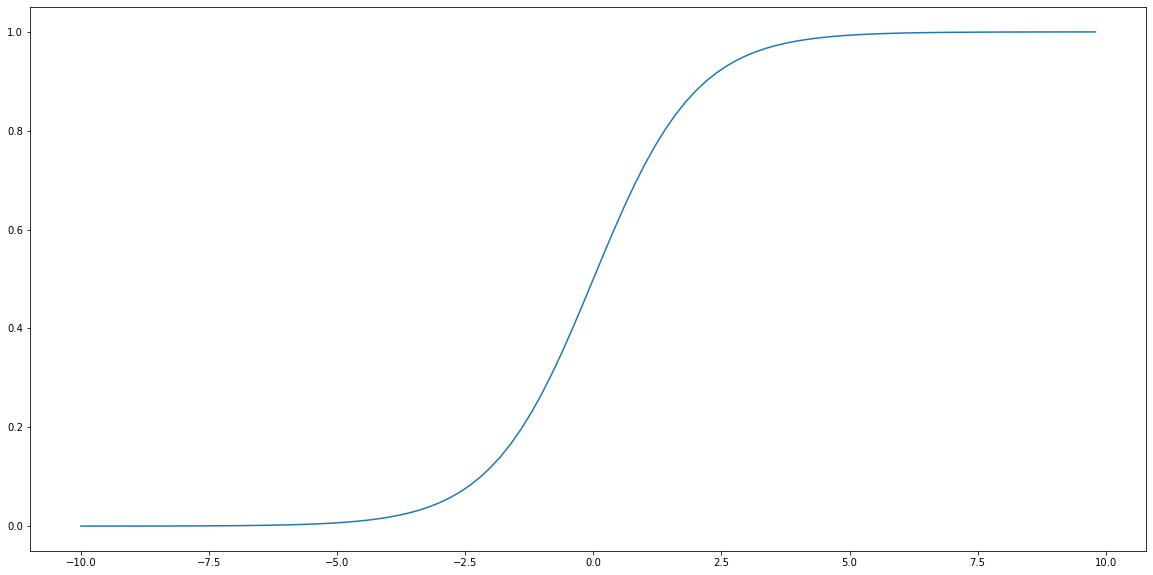

In [2]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.figure(figsize=(20,10))
plt.plot(x, sig)
plt.show()

In [3]:
def sigmoid_derivative(x):
    return x * (1.0 - x)

### Plot the Sigmoid derivative function

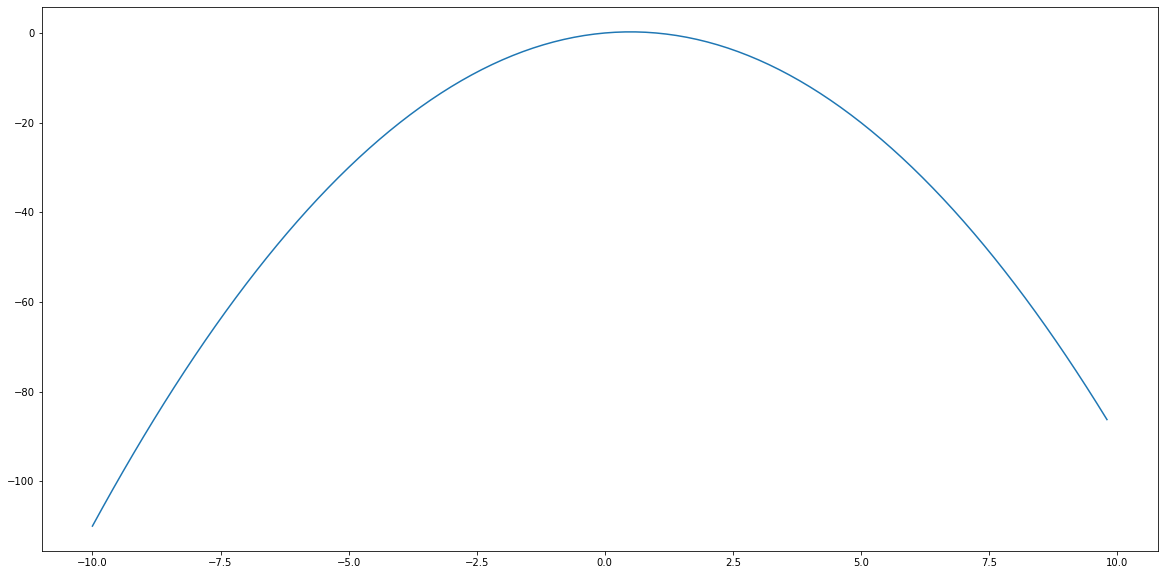

In [4]:
x = np.arange(-10., 10., 0.2)
sig = sigmoid_derivative(x)
plt.figure(figsize=(20,10))
plt.plot(x, sig)
plt.show()

### Loss function - Mear Squared Error:


In [5]:
def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

def mse_loss_derivative(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return (2*(y_true - y_pred))


<img src="./img/FeedForwardBackPropagation.png">

In [6]:
def feed_forward(self):
    self.HIDDEN_LAYER_1 = sigmoid(np.dot(self.IN, self.W1))
    self.output = sigmoid(np.dot(self.HIDDEN_LAYER_1, self.W2))

## Back Propagation - Step 1 - Calculate the loss

<img src="./img/GradientDescentLossFunction.png">


<img src="./img/Loss-Functions-in-Machine-Learning.jpg">

<img src="./img/equation.png">

In [16]:
def d_W2(self):
    d_W2 = np.dot(self.HIDDEN_LAYER_1.T, (mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output)))

<img src="./img/firstLayer.png">

In [17]:
def d_W1(self):
    d_W1 = np.dot(self.IN.T,  (np.dot(mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W2.T) * sigmoid_derivative(self.HIDDEN_LAYER_1)))

In [18]:
def back_propagate(self):
    # application of the chain rule to find derivative of the loss function with respect to W2 and W1
    print(self.HIDDEN_LAYER_1.T)
    d_W2 = np.dot(self.HIDDEN_LAYER_1.T, (mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output)))
    print(d_W2)
    d_W1 = np.dot(self.IN.T,  (np.dot(mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W2.T) * sigmoid_derivative(self.HIDDEN_LAYER_1)))

    # update the weights with the derivative (slope) of the loss function
    self.W1 += self.learning_rate*d_W1
    self.W2 += self.learning_rate*d_W2

### Putting it all together

In [19]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

def mse_loss_derivative(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return (2*(y_true - y_pred))

class ArtificialNeuralNetwork:
    def __init__(self, x, y):
        self.IN      = x
        self.W1   = np.random.rand(self.IN.shape[1],4) 
        self.W2   = np.random.rand(4,1)                 
        self.y          = y
        self.OUT     = np.zeros(self.y.shape)
        self.learning_rate = 0.3

    def feed_forward(self):
        self.HIDDEN_LAYER_1 = sigmoid(np.dot(self.IN, self.W1))
        self.output = sigmoid(np.dot(self.HIDDEN_LAYER_1, self.W2))

    def back_propagate(self):
        # application of the chain rule to find derivative of the loss function with respect to W2 and W1
        print(self.HIDDEN_LAYER_1.T)
        d_W2 = np.dot(self.HIDDEN_LAYER_1.T, (mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output)))
        print(d_W2)
        d_W1 = np.dot(self.IN.T,  (np.dot(mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W2.T) * sigmoid_derivative(self.HIDDEN_LAYER_1)))

        # update the weights with the derivative (slope) of the loss function
        self.W1 += self.learning_rate*d_W1
        self.W2 += self.learning_rate*d_W2

    def train(self, epochs,learning_rate):
        self.learning_rate=learning_rate
        for i in range(epochs):
            self.feed_forward()
            self.back_propagate()
        print("Successfully Trained the Model")
        print("Weights 1:", self.W1)
        print("Weights 2:", self.W2)
    
    def print_output(self):
        print(self.output)



In [20]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
y = np.array([[0],[1],[1],[0]])
epochs = 2
learning_rate = 0.5
ann = ArtificialNeuralNetwork(X,y)
ann.train(epochs, learning_rate)

[[0.53533038 0.68072572 0.60292391 0.73753863]
 [0.50782926 0.66994559 0.50932562 0.67126813]
 [0.56513433 0.67533558 0.69161528 0.7821216 ]
 [0.67575402 0.79049272 0.81246805 0.88692395]]
[[-0.2172224 ]
 [-0.20241048]
 [-0.22900494]
 [-0.26371166]]
[[0.53433172 0.67950757 0.60161123 0.73616871]
 [0.50779746 0.6699047  0.50928058 0.67121562]
 [0.56400889 0.67400625 0.6903066  0.78082252]
 [0.67012734 0.78553838 0.80777387 0.88340601]]
[[-0.16180865]
 [-0.15148383]
 [-0.17017135]
 [-0.19365594]]
Successfully Trained the Model
Weights 1: [[0.27465131 0.00714183 0.54397717 0.72480436]
 [0.61397947 0.67794357 0.46880213 0.58861658]
 [0.13757744 0.03415692 0.2570391  0.69247497]]
Weights 2: [[-0.0821557 ]
 [-0.17381484]
 [-0.06895968]
 [ 0.68908635]]


In [21]:
ann.print_output()

[[0.61899579]
 [0.63684234]
 [0.6445742 ]
 [0.65478142]]


## Neural Network Flow

<img src="./img/nn-flow.png">

# PyTorch

**pip install torch**

**pip install torchvision**

## Tensors

In [28]:
import torch
import numpy as np

## Initializing a Tensor

### Directly from data

In [29]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

### From a NumPy array

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

### From another tensor:

In [30]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4611, 0.2170],
        [0.8938, 0.5890]]) 



### With random or constant values:

In [31]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5726, 0.7813, 0.5626],
        [0.4691, 0.2537, 0.8480]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Attributes of a Tensor

In [32]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Operations on Tensors

In [33]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

### Standard numpy-like indexing and slicing:

In [34]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### Joining tensors

In [35]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


### Arithmetic operations

In [36]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

### Single-element tensors

In [37]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


### In-place operations

In [38]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Tensor to NumPy array

In [39]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [40]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


## NumPy array to Tensor

In [41]:
n = np.ones(5)
t = torch.from_numpy(n)

In [42]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Working with data

In [25]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [26]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

## Iterating and Visualizing the Dataset

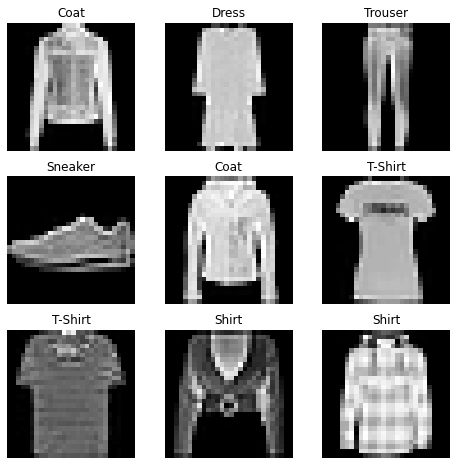

In [27]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [11]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


## Creating Models

In [12]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


## Optimizing the Model Parameters

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [14]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [15]:
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [16]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model)
print("Done!")

Epoch 1
-------------------------------
loss: 2.307018  [    0/60000]
loss: 2.303946  [ 6400/60000]
loss: 2.295012  [12800/60000]
loss: 2.287658  [19200/60000]
loss: 2.284338  [25600/60000]
loss: 2.279076  [32000/60000]
loss: 2.252952  [38400/60000]
loss: 2.255002  [44800/60000]
loss: 2.249150  [51200/60000]
loss: 2.231166  [57600/60000]
Test Error: 
 Accuracy: 38.3%, Avg loss: 0.035229 

Epoch 2
-------------------------------
loss: 2.244898  [    0/60000]
loss: 2.260123  [ 6400/60000]
loss: 2.248792  [12800/60000]
loss: 2.240926  [19200/60000]
loss: 2.216482  [25600/60000]
loss: 2.231275  [32000/60000]
loss: 2.165977  [38400/60000]
loss: 2.180882  [44800/60000]
loss: 2.171887  [51200/60000]
loss: 2.136350  [57600/60000]
Test Error: 
 Accuracy: 39.5%, Avg loss: 0.033998 

Epoch 3
-------------------------------
loss: 2.170408  [    0/60000]
loss: 2.203586  [ 6400/60000]
loss: 2.189100  [12800/60000]
loss: 2.167179  [19200/60000]
loss: 2.115613  [25600/60000]
loss: 2.165374  [32000/600

## Saving Models

In [17]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## Loading Models

In [18]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [19]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Sneaker", Actual: "Ankle boot"
